<IPython.core.display.Javascript object>


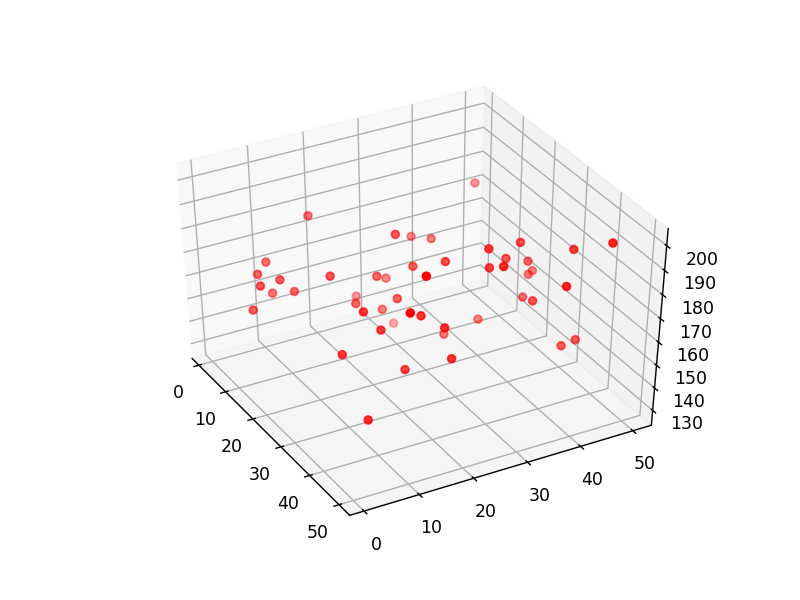

<IPython.core.display.Javascript object>


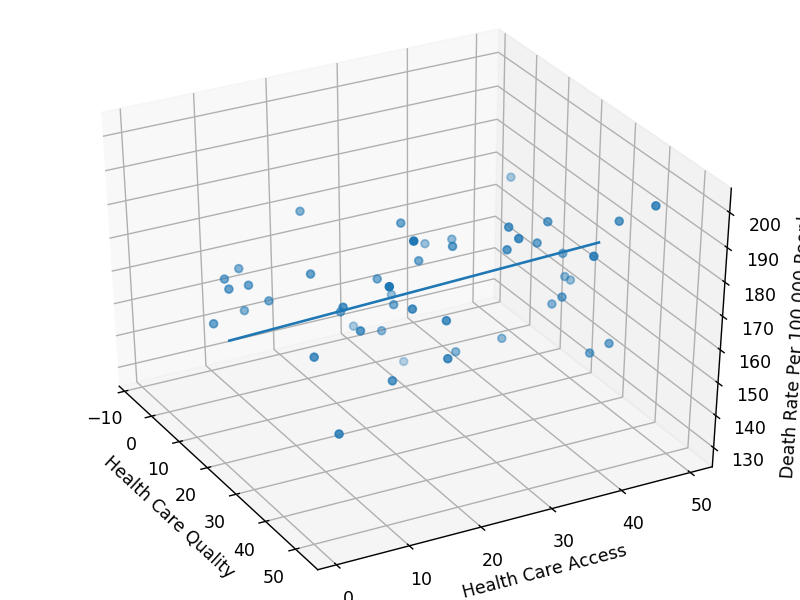

In [2]:
# coding: utf-8
# Written by Daniel Koenig and Rachel Harvill
# Create 3D Plots using Cancer Data

get_ipython().magic('matplotlib notebook')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cancerData = pd.read_csv(r"MergedData.csv", delimiter="	", index_col=2)
cancerData = cancerData.dropna(axis=1, how="all")

zAxis = cancerData.iloc[:,0]
yAxis = cancerData.iloc[:,2]
xAxis = cancerData.iloc[:,3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xAxis, yAxis, zAxis, c="r", marker="o", depthshade=True)

data = np.concatenate((xAxis[:, np.newaxis], 
                       yAxis[:, np.newaxis], 
                       zAxis[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-40:50:8j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

# Verify that everything looks right.

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T)
ax.set_xlabel("Health Care Quality")
ax.set_ylabel("Health Care Access")
ax.set_zlabel("Death Rate Per 100,000 People")
plt.show()
plt.savefig('3Dregression.png', dpi=300)